In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:12<00:00, 83.7MB/s]
100% 1.03G/1.03G [00:12<00:00, 90.2MB/s]


In [ ]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import skimage
from skimage.transform import resize
from IPython.display import Image, display

import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
train_path = '/content/asl_alphabet_train/asl_alphabet_train'
test_path = '/content/asl_alphabet_test/asl_alphabet_test'

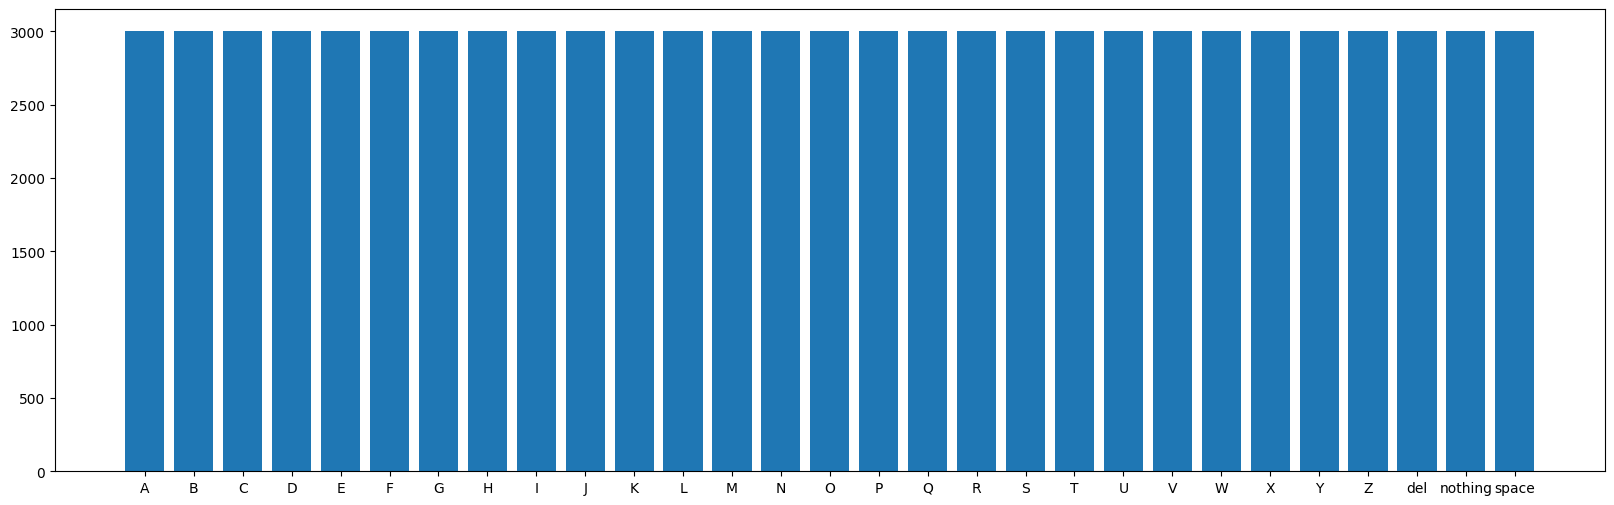

In [ ]:
classes = sorted(os.listdir(train_path))
numbers = []

for i in classes:
  numbers.append(len(os.listdir(train_path + '/' + i)))
  
plt.figure(figsize = (20,6))
plt.bar(classes, numbers)
plt.show()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

A


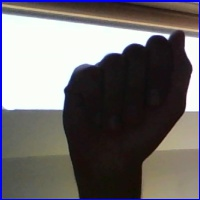

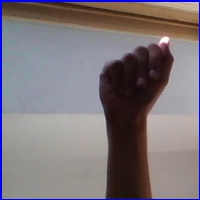

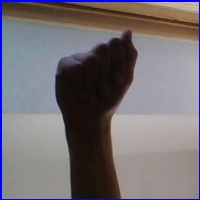

There are 3000 images in A class.

B


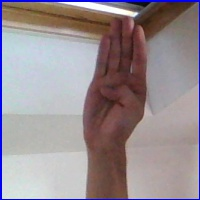

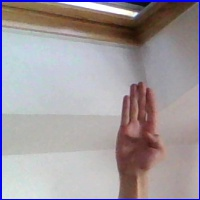

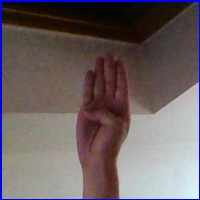

There are 3000 images in B class.

C


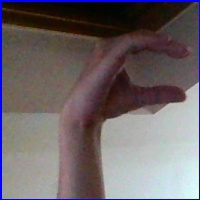

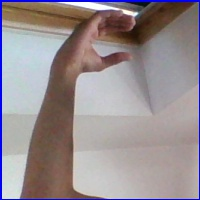

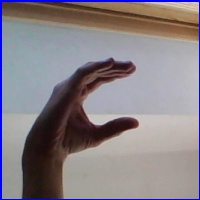

There are 3000 images in C class.

D


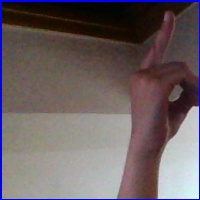

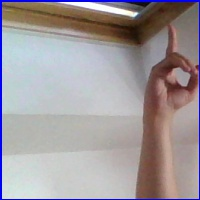

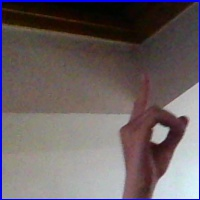

There are 3000 images in D class.

E


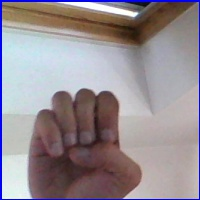

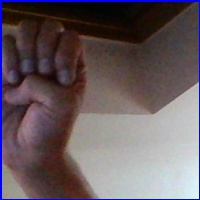

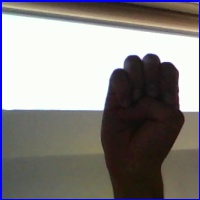

There are 3000 images in E class.

F


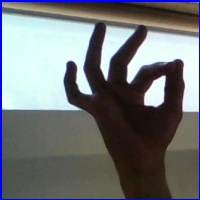

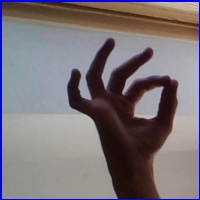

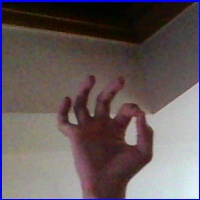

There are 3000 images in F class.

G


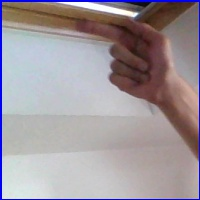

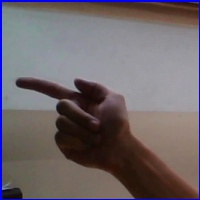

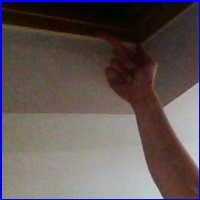

There are 3000 images in G class.

H


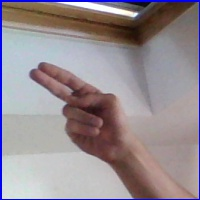

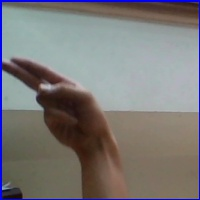

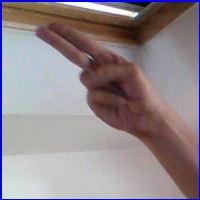

There are 3000 images in H class.

I


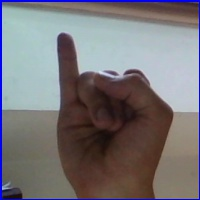

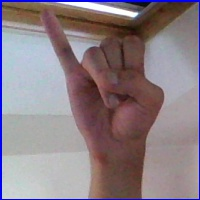

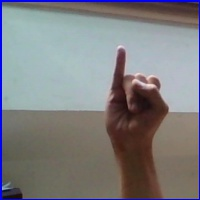

There are 3000 images in I class.

J


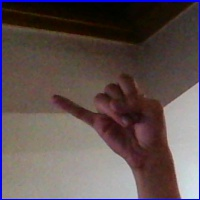

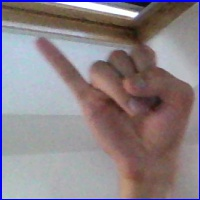

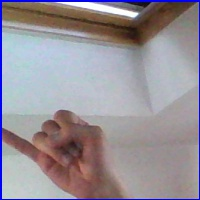

There are 3000 images in J class.

K


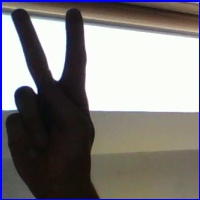

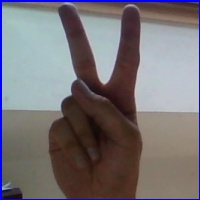

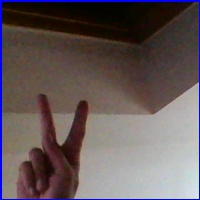

There are 3000 images in K class.

L


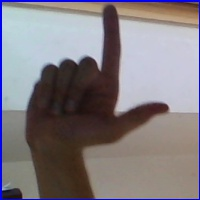

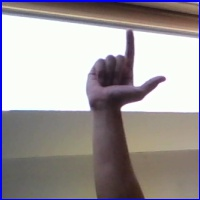

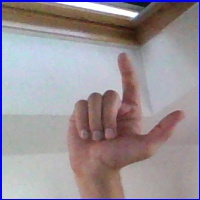

There are 3000 images in L class.

M


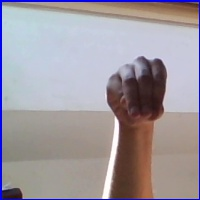

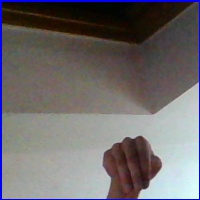

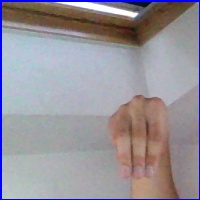

There are 3000 images in M class.

N


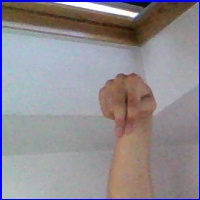

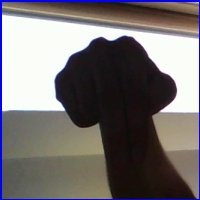

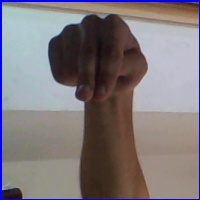

There are 3000 images in N class.

O


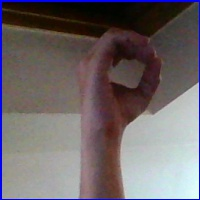

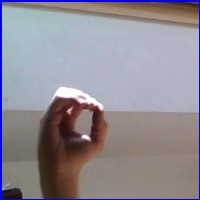

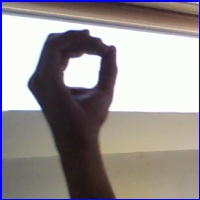

There are 3000 images in O class.

P


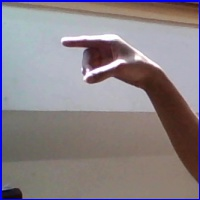

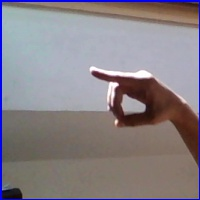

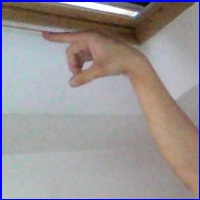

There are 3000 images in P class.

Q


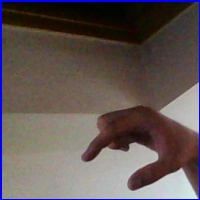

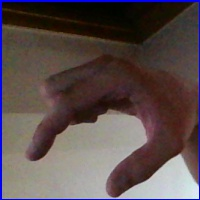

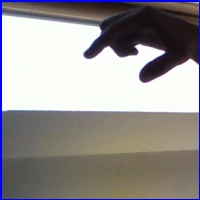

There are 3000 images in Q class.

R


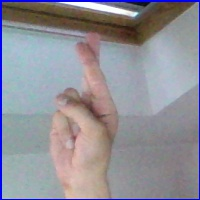

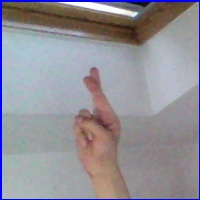

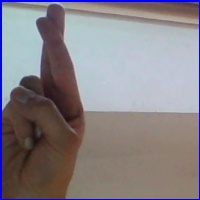

There are 3000 images in R class.

S


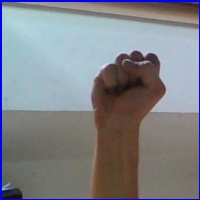

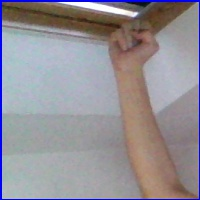

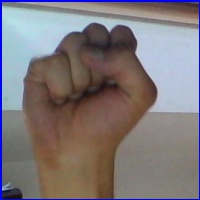

There are 3000 images in S class.

T


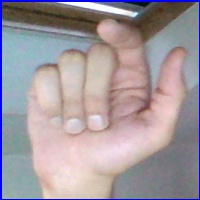

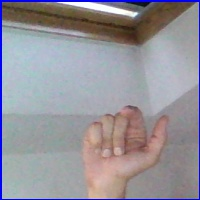

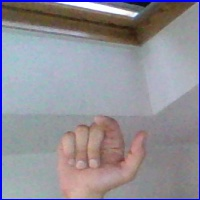

There are 3000 images in T class.

U


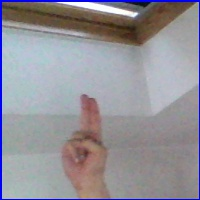

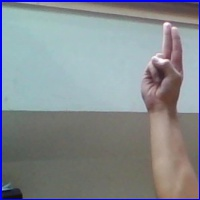

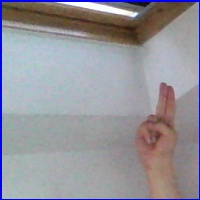

There are 3000 images in U class.

V


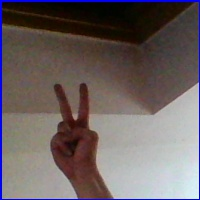

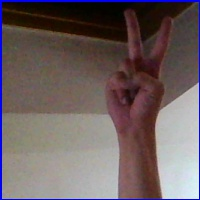

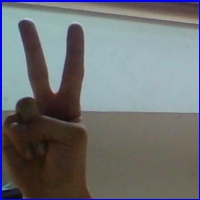

There are 3000 images in V class.

W


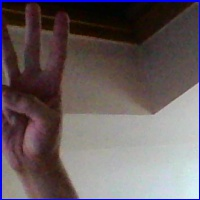

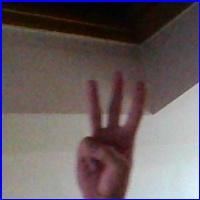

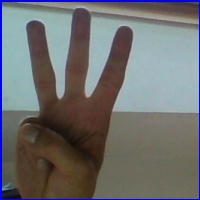

There are 3000 images in W class.

X


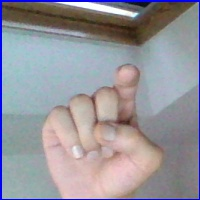

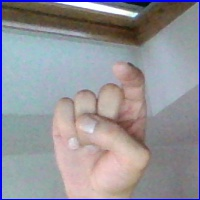

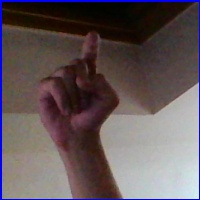

There are 3000 images in X class.

Y


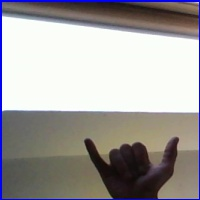

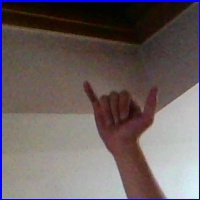

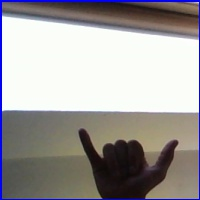

There are 3000 images in Y class.

Z


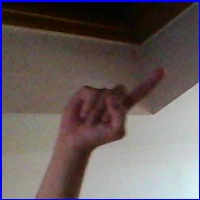

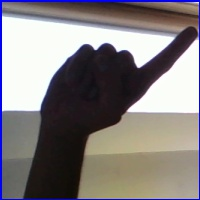

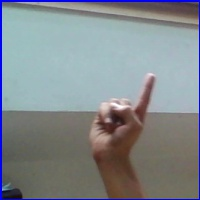

There are 3000 images in Z class.

del


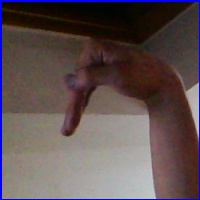

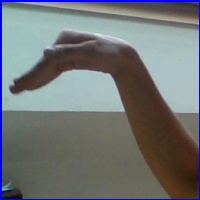

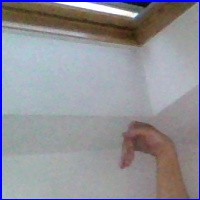

There are 3000 images in del class.

nothing


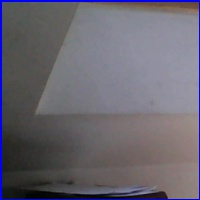

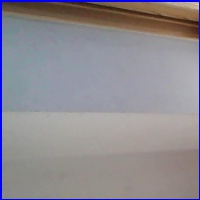

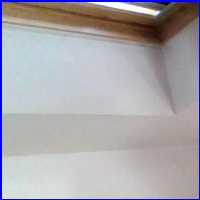

There are 3000 images in nothing class.

space


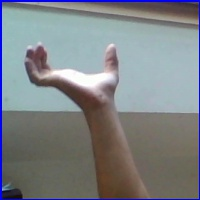

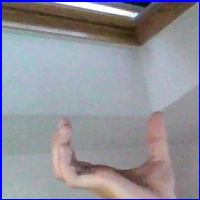

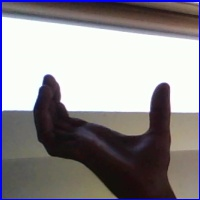

There are 3000 images in space class.


In [ ]:
labels = sorted(os.listdir(train_path))
print(labels)

for i in labels:
  path = train_path + '/' + i
  folder_data = os.listdir(path)
  k = 0
  print("")
  print(i)
  for image_path in folder_data:
    if k < 3:
      display(Image(path + '/' + image_path))
    k += 1
  print('There are', k, 'images in', i, 'class.')

In [ ]:
def obtain_data(data_dir):
  images = []
  labels = []
  dir_list = sorted(os.listdir(data_dir))
  for i in range(len(dir_list)):
    print('Obtaining', dir_list[i], 'images.')
    for image in os.listdir(data_dir + '/' + dir_list[i]):
      img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
      img = cv2.resize(img, (32, 32))
      images.append(img)
      labels.append(i)
  return images, labels

x, y = obtain_data(train_path)

Obtaining A images.
Obtaining B images.
Obtaining C images.
Obtaining D images.
Obtaining E images.
Obtaining F images.
Obtaining G images.
Obtaining H images.
Obtaining I images.
Obtaining J images.
Obtaining K images.
Obtaining L images.
Obtaining M images.
Obtaining N images.
Obtaining O images.
Obtaining P images.
Obtaining Q images.
Obtaining R images.
Obtaining S images.
Obtaining T images.
Obtaining U images.
Obtaining V images.
Obtaining W images.
Obtaining X images.
Obtaining Y images.
Obtaining Z images.
Obtaining del images.
Obtaining nothing images.
Obtaining space images.


In [ ]:
def preprocess_data(x, y):
  np_x = np.array(x)
  normalised_x = np_x.astype('float32') / 255
  label_encoded_y = utils.to_categorical(y)
  x_train, x_valtest, y_train, y_valtest = train_test_split(normalised_x, label_encoded_y, train_size = 0.8)
  x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size = 0.5)
  return x_train, x_val, x_test, y_train, y_val, y_test

x_train, x_val, x_test, y_train, y_val, y_test = preprocess_data(x, y)

In [ ]:
print("Training data:", x_train.shape)
print("Validation data:", x_val.shape)
print("Test data:", x_test.shape)

Training data: (69600, 32, 32, 3)
Validation data: (8700, 32, 32, 3)
Test data: (8700, 32, 32, 3)


In [ ]:
densenet121_model = tf.keras.applications.DenseNet121(input_shape = (32,32,3), include_top = False, weights = 'imagenet')

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
densenet121_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

In [ ]:
for layer in densenet121_model.layers:
  layer.trainable = False

In [ ]:
densenet121_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

In [ ]:
model = tf.keras.Sequential([
  densenet121_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1000, activation = 'relu'),
  tf.keras.layers.Dense(29, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              1025000   
                                                                 
 dense_1 (Dense)             (None, 29)                29029     
                                                                 
Total params: 8,091,533
Trainable params: 1,054,029
Non-trainable params: 7,037,504
_________________________________________________________________


In [ ]:
base_learning_rate = 0.0001

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
2175/2175 [==============================] - 312s 138ms/step - loss: 1.0114 - accuracy: 0.7392 - val_loss: 0.4874 - val_accuracy: 0.8817
Epoch 2/10
2175/2175 [==============================] - 314s 144ms/step - loss: 0.3611 - accuracy: 0.9112 - val_loss: 0.2875 - val_accuracy: 0.9289
Epoch 3/10
2175/2175 [==============================] - 312s 144ms/step - loss: 0.2216 - accuracy: 0.9467 - val_loss: 0.1962 - val_accuracy: 0.9537
Epoch 4/10
2175/2175 [==============================] - 312s 144ms/step - loss: 0.1517 - accuracy: 0.9658 - val_loss: 0.1522 - val_accuracy: 0.9632
Epoch 5/10
2175/2175 [==============================] - 313s 144ms/step - loss: 0.1103 - accuracy: 0.9756 - val_loss: 0.1149 - val_accuracy: 0.9730
Epoch 6/10
2175/2175 [==============================] - 315s 145ms/step - loss: 0.0841 - accuracy: 0.9822 - val_loss: 0.0898 - val_accuracy: 0.9782
Epoch 7/10
2175/2175 [==============================] - 345s 158ms/step - loss: 0.0658 - accuracy: 0.9860 - val_

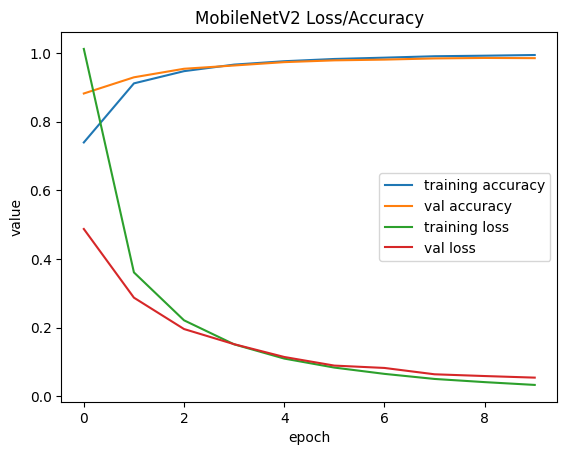

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('DenseNet121 Loss/Accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

272/272 [==============================] - 31s 113ms/step - loss: 0.0533 - accuracy: 0.9848
Test Accuracy: 0.9848275780677795
Test Loss: 0.05326753482222557


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = -1)
y_pred

272/272 [==============================] - 33s 113ms/step


array([ 6, 16, 21, ..., 19,  0,  3])

In [ ]:
y_testing = np.argmax(y_test, axis = 1)
y_testing

array([ 6, 16, 21, ..., 19,  0,  3])

In [ ]:
print('The accuracy obtained on the test set using DenseNet121 is:', accuracy_score(y_pred, y_testing))

The accuracy obtained on the test set using DenseNet121 is: 0.9848275862068966


In [ ]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       321
           1       1.00      1.00      1.00       296
           2       0.99      1.00      1.00       312
           3       1.00      0.99      0.99       293
           4       0.98      0.99      0.98       303
           5       0.99      0.99      0.99       283
           6       1.00      0.98      0.99       310
           7       1.00      1.00      1.00       304
           8       1.00      0.97      0.99       306
           9       0.99      1.00      1.00       312
          10       0.99      0.97      0.98       275
          11       0.99      1.00      0.99       289
          12       0.99      0.99      0.99       297
          13       1.00      0.98      0.99       303
          14       0.98      1.00      0.99       292
          15       0.99      1.00      0.99       299
          16       1.00      0.99      1.00       316
          17       0.96    

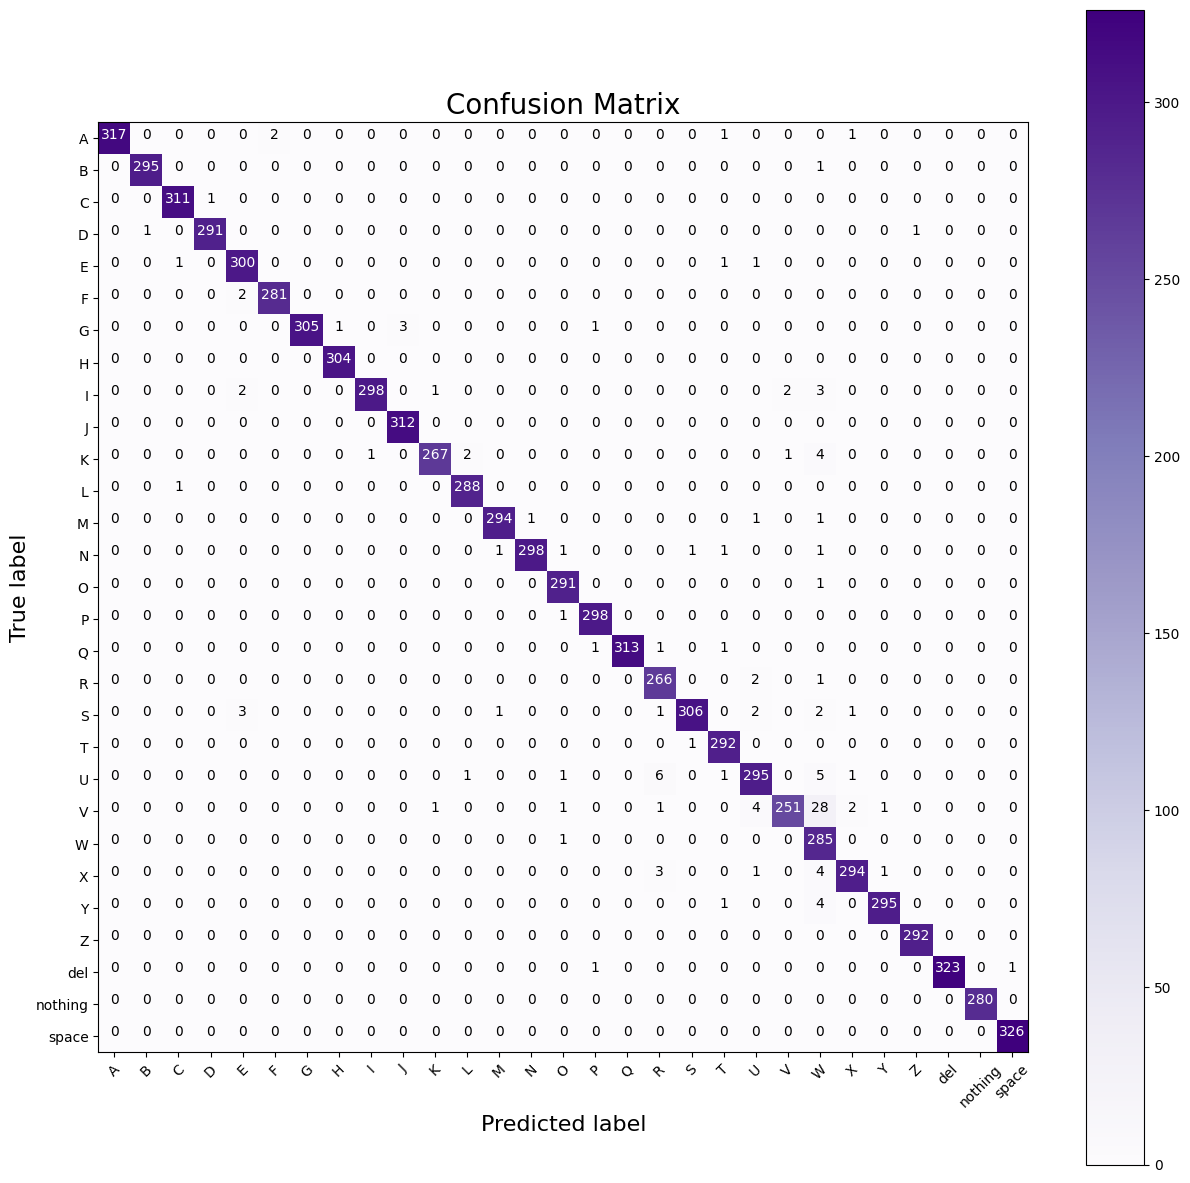

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_testing, y_pred)

In [ ]:
print("Number of layers in the base model:", len(densenet121_model.layers))

Number of layers in the base model: 427


In [ ]:
for layer in densenet121_model.layers:
        layer.trainable = True

In [ ]:
densenet121_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']             
                                                                                        

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              1025000   
                                                                 
 dense_1 (Dense)             (None, 29)                29029     
                                                                 
Total params: 8,091,533
Trainable params: 8,007,885
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = base_learning_rate/10), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
historyft = model.fit(x_train, y_train, epochs = 20, initial_epoch = history.epoch[-1], validation_data = (x_val, y_val))

Epoch 10/20
2175/2175 [==============================] - 1508s 674ms/step - loss: 3.2561 - accuracy: 0.4858 - val_loss: 0.7284 - val_accuracy: 0.7962
Epoch 11/20
2175/2175 [==============================] - 1411s 649ms/step - loss: 0.7398 - accuracy: 0.7828 - val_loss: 0.2429 - val_accuracy: 0.9215
Epoch 12/20
2175/2175 [==============================] - 1403s 645ms/step - loss: 0.3485 - accuracy: 0.8873 - val_loss: 0.0960 - val_accuracy: 0.9687
Epoch 13/20
2175/2175 [==============================] - 1398s 643ms/step - loss: 0.1965 - accuracy: 0.9347 - val_loss: 0.0442 - val_accuracy: 0.9863
Epoch 14/20
2175/2175 [==============================] - 1403s 645ms/step - loss: 0.1226 - accuracy: 0.9586 - val_loss: 0.0275 - val_accuracy: 0.9914
Epoch 15/20
2175/2175 [==============================] - 1396s 642ms/step - loss: 0.0811 - accuracy: 0.9727 - val_loss: 0.0165 - val_accuracy: 0.9947
Epoch 16/20
2175/2175 [==============================] - 1418s 652ms/step - loss: 0.0584 - accuracy:

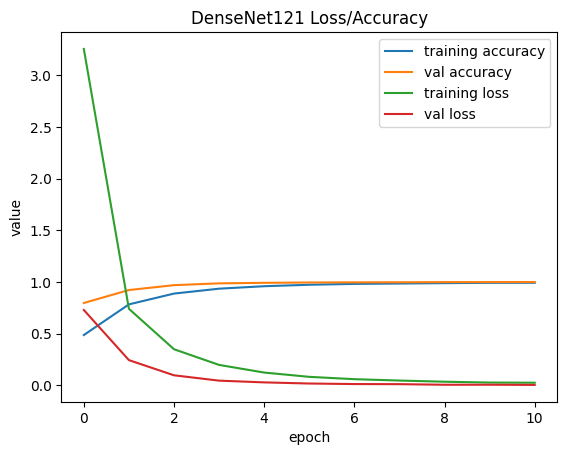

In [ ]:
plt.figure()
plt.plot(historyft.history['accuracy'], label='training accuracy')
plt.plot(historyft.history['val_accuracy'], label='val accuracy')
plt.plot(historyft.history['loss'], label='training loss')
plt.plot(historyft.history['val_loss'], label='val loss')
plt.title('DenseNet121 Loss/Accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

272/272 [==============================] - 33s 123ms/step - loss: 0.0025 - accuracy: 0.9992
Test Accuracy: 0.999195396900177
Test Loss: 0.0025059087201952934


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis = -1)
y_pred

272/272 [==============================] - 34s 117ms/step


array([ 6, 16, 21, ..., 19,  0,  3])

In [ ]:
y_testing = np.argmax(y_test, axis = 1)
y_testing

array([ 6, 16, 21, ..., 19,  0,  3])

In [ ]:
print('The accuracy obtained on the test set using DenseNet121 is:', accuracy_score(y_pred, y_testing))

The accuracy obtained on the test set using DenseNet121 is: 0.9991954022988506


In [ ]:
print(classification_report(y_testing, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       296
           2       1.00      1.00      1.00       312
           3       1.00      1.00      1.00       293
           4       1.00      1.00      1.00       303
           5       1.00      1.00      1.00       283
           6       1.00      1.00      1.00       310
           7       1.00      1.00      1.00       304
           8       1.00      1.00      1.00       306
           9       1.00      1.00      1.00       312
          10       1.00      1.00      1.00       275
          11       1.00      1.00      1.00       289
          12       1.00      1.00      1.00       297
          13       1.00      1.00      1.00       303
          14       1.00      1.00      1.00       292
          15       1.00      1.00      1.00       299
          16       1.00      1.00      1.00       316
          17       1.00    

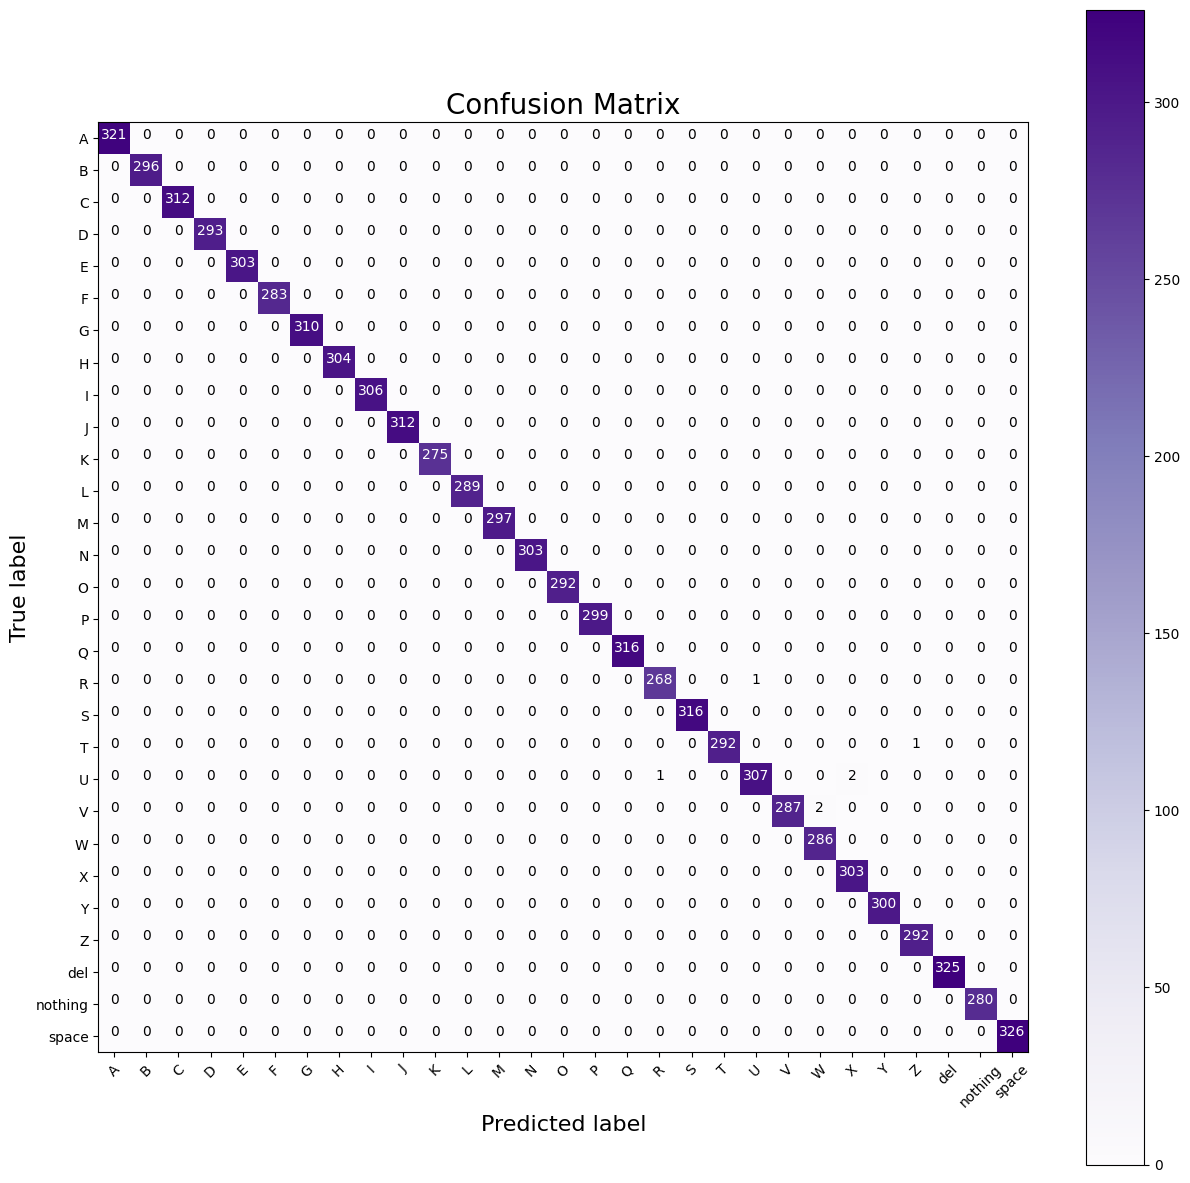

In [ ]:
def plot_confusion_matrix(y, y_pred):
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize = (15, 15))
  ax = plt.subplot()
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
  plt.colorbar()
  plt.title("Confusion Matrix")
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax.title.set_fontsize(20)
  ax.xaxis.label.set_fontsize(16)
  ax.yaxis.label.set_fontsize(16)
  limit = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
  plt.show()

plot_confusion_matrix(y_testing, y_pred)

1/1 [==============================] - 0s 39ms/step
Prediction of image is: C



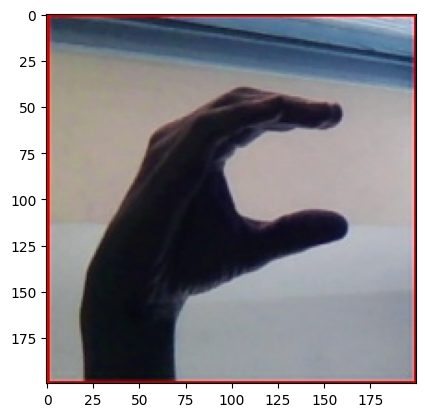

In [ ]:
testimage = []
img = cv2.imread('/content/asl_alphabet_test/asl_alphabet_test/C_test.jpg')
plt.imshow(img)
img = cv2.resize(img, (32, 32))
testimage.append(img)
np_x = np.array(testimage)
imge = np_x.astype('float32') / 255
predict = np.argmax(model.predict(imge), axis = -1)

if predict[0] == 0:
  prediction = 'A'
elif predict[0] == 1:
  prediction = 'B'
elif predict[0] == 2:
  prediction = 'C'
elif predict[0] == 3:
  prediction = 'D'
elif predict[0] == 4:
  prediction = 'E'
elif predict[0] == 5:
  prediction = 'F'
elif predict[0] == 6:
  prediction = 'G'
elif predict[0] == 7:
  prediction = 'H'
elif predict[0] == 8:
  prediction = 'I'
elif predict[0] == 9:
  prediction = 'J'
elif predict[0] == 10:
  prediction = 'K'
elif predict[0] == 11:
  prediction = 'L'
elif predict[0] == 12:
  prediction = 'M'
elif predict[0] == 13:
  prediction = 'N'
elif predict[0] == 14:
  prediction = 'O'
elif predict[0] == 15:
  prediction = 'P'
elif predict[0] == 16:
  prediction = 'Q'
elif predict[0] == 17:
  prediction = 'R'
elif predict[0] == 18:
  prediction = 'S'
elif predict[0] == 19:
  prediction = 'T'
elif predict[0] == 20:
  prediction = 'U'
elif predict[0] == 21:
  prediction = 'V'
elif predict[0] == 22:
  prediction = 'W'
elif predict[0] == 23:
  prediction = 'X'
elif predict[0] == 24:
  prediction = 'Y'
elif predict[0] == 25:
  prediction = 'Z'
elif predict[0] == 26:
  prediction = 'del'
elif predict[0] == 27:
  prediction = 'nothing'
elif predict[0] == 28:
  prediction = 'space'
else:
  prediction = 'invalid'
    
print('Prediction of image is:', prediction)
print('')